In [1]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import glob
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load Data

In [2]:
# use glob to get a list of all csv files in the folder
csv_files = glob.glob('../rf_xgb/data/daily/*.csv')

# create an empty list to store the data frames
df_list = []

# use a for loop to read each csv file and store it in the data frame list
for file in csv_files:
    df = pd.read_csv(file, sep=';')
    df_list.append(df)

# use pd.concat to merge the data frames in the list
df = pd.concat(df_list, ignore_index=True)

In [3]:
df.head()

,YYYY,MM,DD,DOY,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,...,swe,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4
0,1981,1,1,1,-8.1,-10.6,-14.6,-11.5,-15.3,-18.9,...,398.22,76,15,32,12,77187,-0.05,3.88,0.39,0.45
1,1981,1,2,2,-11.5,-13.3,-15.1,-13.4,-15.5,-16.9,...,404.12,109,22,58,20,77098,0.00,8.19,0.39,0.45
2,1981,1,3,3,-6.0,-8.6,-12.9,-7.0,-10.7,-14.3,...,411.26,89,19,32,5,76521,-0.05,10.02,0.39,0.45
3,1981,1,4,4,-5.3,-8.2,-13.8,-6.8,-9.6,-16.5,...,429.33,57,11,65,16,75728,-0.01,18.61,0.39,0.45
4,1981,1,5,5,-13.8,-15.5,-16.6,-16.7,-18.2,-19.6,...,443.55,73,14,63,23,76093,0.12,11.69,0.39,0.45


In [4]:
# Load data
X =  df.drop(columns=['prec'])
y = df['prec']

# Split data into training and a test set using 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and evaluate models

## Model 1: Linear Regression

In [5]:
# Train linear regression model
linr = LinearRegression().fit(X_train, y_train)

# Make predictions with linear regression model
linr_y_pred = linr.predict(X_test)

## Model 2: Stochastic Gradient Descent Regression (SVR)

In [6]:
# Train SGD regression model
sgd = SGDRegressor(max_iter=1000, tol=1e-3).fit(X_train, y_train)

# Make predictions with SGD regression model
sgd_y_pred = sgd.predict(X_test)

## Evaluate Models using MSE, MAE and R2 Score

In [7]:
# Compute the evaluation metrics
linr_mse = mean_squared_error(y_test, linr_y_pred)
linr_mae = mean_absolute_error(y_test, linr_y_pred)
linr_r2 = r2_score(y_test, linr_y_pred)

sgd_mse = mean_squared_error(y_test, sgd_y_pred)
sgd_mae = mean_absolute_error(y_test, sgd_y_pred)
sgd_r2 = r2_score(y_test, sgd_y_pred)

print("[Linear Regression] MSE:", linr_mse)
print("[Linear Regression] MAE:", linr_mae)
print("[Linear Regression] R2:", linr_r2)
print("[SGD] MSE:", sgd_mse)
print("[SGD] MAE:", sgd_mae)
print("[SGD] R2:", sgd_r2)

[Linear Regression] MSE: 23.84620647252732
[Linear Regression] MAE: 3.295380363767914
[Linear Regression] R2: 0.48860946816340434
[SGD] MSE: 1.3167029324269006e+35
[SGD] MAE: 3.6182859165045677e+17
[SGD] R2: -2.823717112658353e+33


# Analyse feature importances

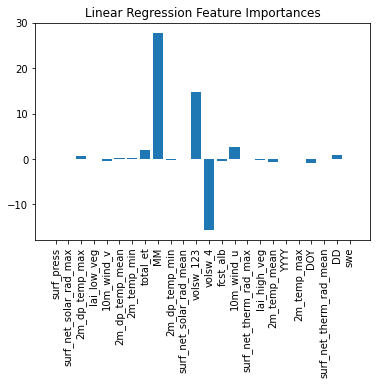

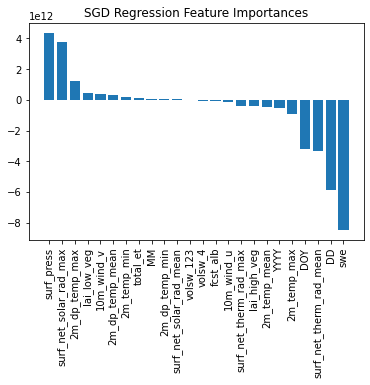

In [8]:
linr_coefficients = linr.coef_
sgd_coefficients = sgd.coef_

sorted_idx = linr_coefficients.argsort()[::-1]
sorted_idx = sgd_coefficients.argsort()[::-1]

# Get the names of the features
feature_names = X.columns[sorted_idx]

# Create a bar plot of the feature importances of the linear regression model
plt.bar(range(X.shape[1]), linr_coefficients[sorted_idx])
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.title("Linear Regression Feature Importances")
plt.show()

# Create a bar plot of the feature importances of the SGD regression model
plt.bar(range(X.shape[1]), sgd_coefficients[sorted_idx])
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.title("SGD Regression Feature Importances")
plt.show()